In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import matplotlib.pyplot as plt
from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls
import pandas as pd
import numpy as np

In [2]:
WEEKDAYS_IN_YEAR = 261
DAYS_IN_MONTH = 20

dl = DataLib("SignalData")
BondReturnIdx = dl.pull("BondRetIdx/LocalFX")
fxvsusd = dl.pull("fxVsUSD")
equities = dl.pull("EquityPrices")
m1 = dl.pull("M1/inUSD")
m2 = dl.pull("M2/inUSD")
m3 = dl.pull("M3/inUSD")
curr_acct_nom = dl.pull("CurrAcctNom/inUSD")
curr_acct_gdp = dl.pull("CurrAcctPctGDP")
LongRates = dl.pull("LongRates")
ShortRates = dl.pull("ShortRates")
fxNominal = dl.pull("fxTrdWts/Nominal")
fxReal = dl.pull("fxTrdWts/Real")
core_cpi = dl.pull("CoreCPI/SA")
gdp_real = dl.pull("GDP/Real")

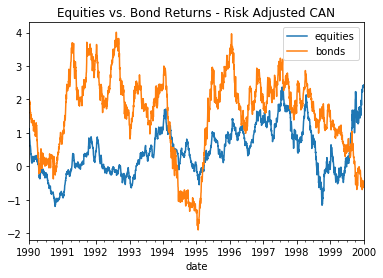

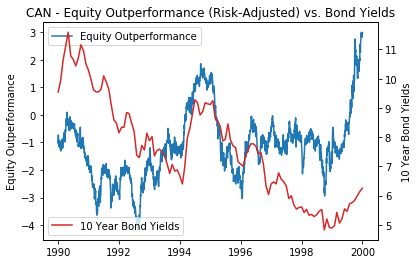

In [4]:
equity_ret = equities.pct_change(WEEKDAYS_IN_YEAR)
equity_risk_adjusted = equity_ret / equity_ret.std()
bond_ret = BondReturnIdx.pct_change(WEEKDAYS_IN_YEAR)
bond_risk_adjusted = bond_ret / bond_ret.std()

country = "CAN"
start_date = '1990-01-01'
end_date = '2000-01-01'
equity_risk_adjusted[country].loc[start_date:end_date].plot(label = "equities")
bond_risk_adjusted[country].loc[start_date:end_date].plot(label = "bonds")
plt.legend()
plt.title("Equities vs. Bond Returns - Risk Adjusted " + country)
plt.show()

equity_risk_adjusted_outperformance = (equity_risk_adjusted - bond_risk_adjusted)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'Equity Outperformance'
ax1.plot(equity_risk_adjusted_outperformance[country].loc[start_date:end_date].to_timestamp(), label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = '10 Year Bond Yields'
ax2.plot(LongRates[country].loc[start_date:end_date].to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend(loc = "lower left")
plt.title(country + " - Equity Outperformance (Risk-Adjusted) vs. Bond Yields")
plt.show()

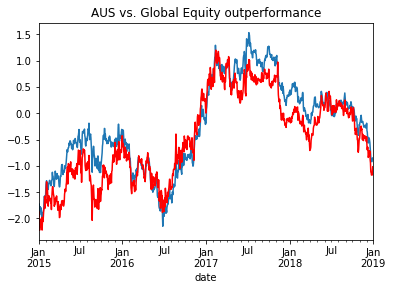

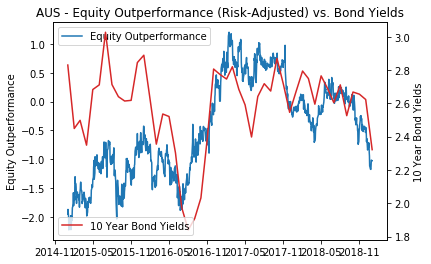

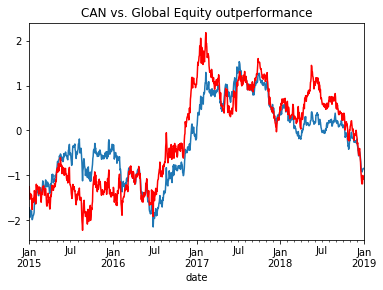

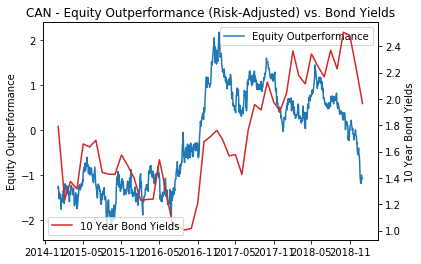

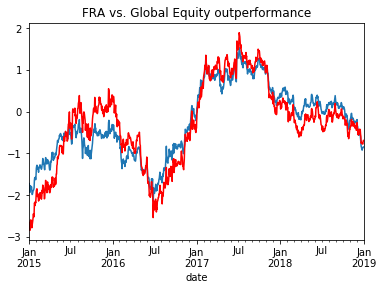

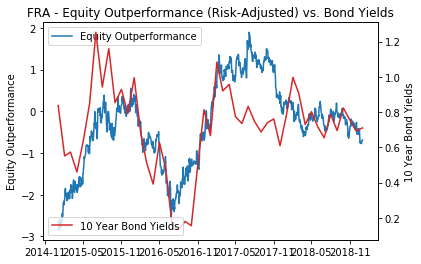

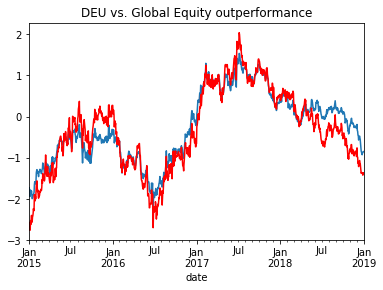

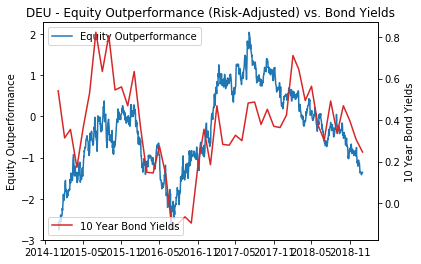

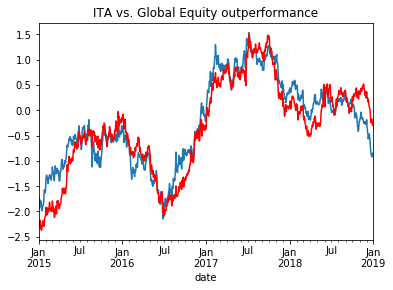

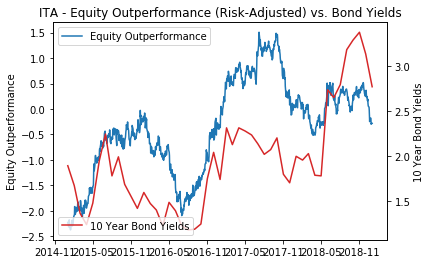

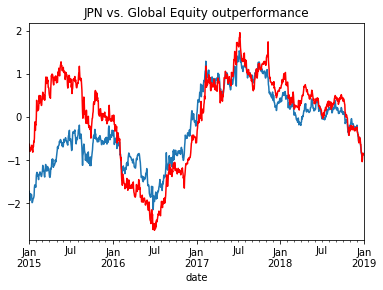

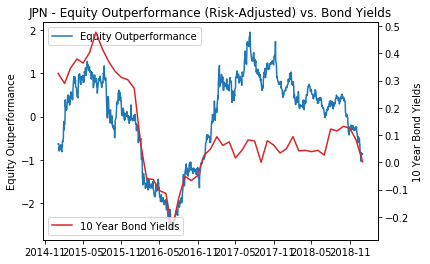

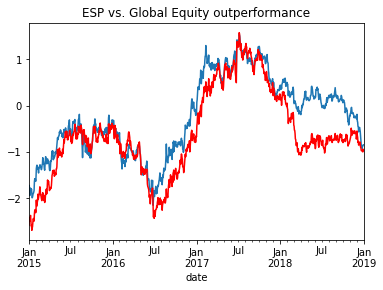

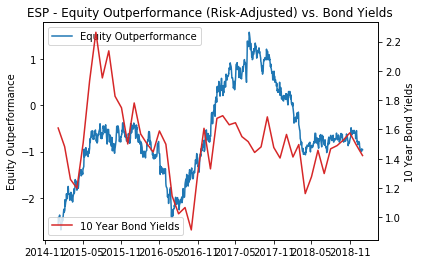

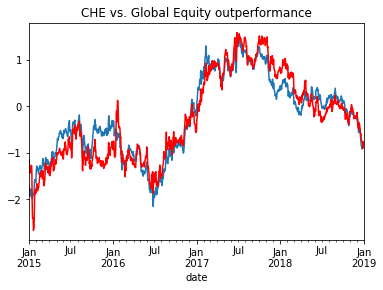

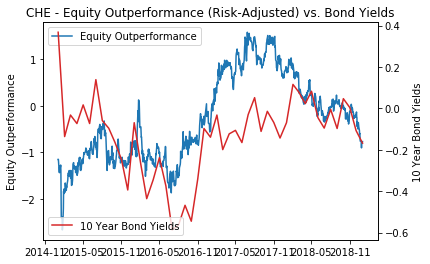

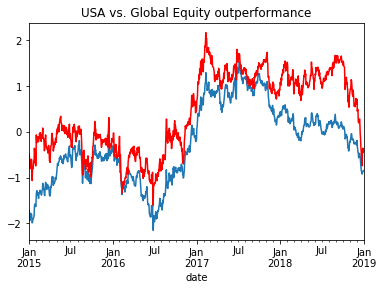

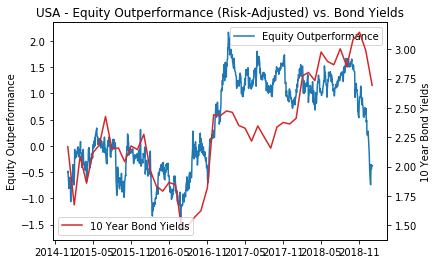

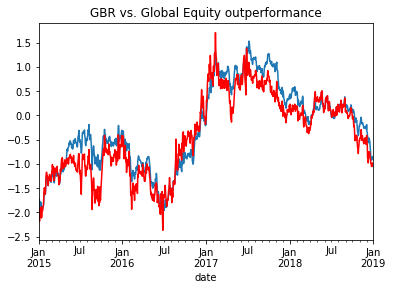

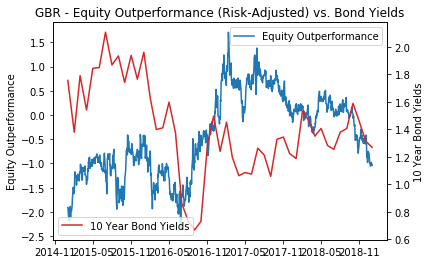

In [16]:
start_date = "2015-01-01"
end_date = "2019-01-01"
for country in equities.columns:
    equity_risk_adjusted_outperformance.mean(axis=1).loc[start_date:end_date].plot()
    equity_risk_adjusted_outperformance[country].loc[start_date:end_date].plot(color = "red")
    plt.title(country + " vs. Global Equity outperformance")
    plt.show()

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1_label = 'Equity Outperformance'
    ax1.plot(equity_risk_adjusted_outperformance[country].loc[start_date:end_date].to_timestamp(), label = ax1_label)
    ax1.set_ylabel(ax1_label)
    ax1.legend()
    ax2_label = '10 Year Bond Yields'
    ax2.plot(LongRates[country].loc[start_date:end_date].to_timestamp(), color = 'tab:red', label = ax2_label)
    ax2.set_ylabel(ax2_label)
    ax2.legend(loc = "lower left")
    plt.title(country + " - Equity Outperformance (Risk-Adjusted) vs. Bond Yields")
    plt.show()

**Takeaways**:
- When country-specific equity out-performance exceeds that of global equity outperformance, the country is far more likely to experience bond yields rise. Weighting across countries will be standardized around global avg.
- Percentage change in Equity Outperformance 

In [ ]:
start_date = '1990-01-01'
end_date = '2015-01-01'
trade_date = '2015-01-02'
unwind_date = '2019-01-01'
trade_range = pd.date_range(trade_date, unwind_date, freq='B')
daily_pl = pd.DataFrame(index = trade_range.to_period("B"), columns = ["Daily P&L"])

equity_ret = equities.pct_change(WEEKDAYS_IN_YEAR)
equity_risk_adjusted = equity_ret / equity_ret.std()
bond_ret = BondReturnIdx.pct_change(WEEKDAYS_IN_YEAR)
bond_risk_adjusted = bond_ret / bond_ret.std()

for date in pd.date_range(trade_date, unwind_date, freq='B').date:
        training_data = eq